In [1]:
#import
# ===============================
# Core Libraries
# ===============================
import os
import re
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from imblearn.over_sampling import SMOTE

# ===============================
# Preprocessing
# ===============================
from sklearn.preprocessing import (
    LabelEncoder,
    StandardScaler
)
from sklearn.model_selection import train_test_split

# ===============================
# Classification Models (REQUIRED 6)
# ===============================
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# ===============================
# Evaluation Metrics (REQUIRED)
# ===============================
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    matthews_corrcoef,
    confusion_matrix,
    classification_report
)

# ===============================
# Dataset Download (Kaggle)
# ===============================
import kagglehub


In [2]:

path = kagglehub.dataset_download("dbshan/employee-attrition")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\Hxtreme\.cache\kagglehub\datasets\dbshan\employee-attrition\versions\1


In [3]:
# List files
print(os.listdir(path))

# Load dataset
df = pd.read_csv(os.path.join(path, "employee_attrition.csv"))

# Quick inspection
df.head(), df.shape


['Employee_Attrition.csv']


(   Age Attrition     BusinessTravel  DailyRate              Department  \
 0   41       Yes      Travel_Rarely       1102                   Sales   
 1   49        No  Travel_Frequently        279  Research & Development   
 2   37       Yes      Travel_Rarely       1373  Research & Development   
 3   33        No  Travel_Frequently       1392  Research & Development   
 4   27        No      Travel_Rarely        591  Research & Development   
 
    DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
 0                 1          2  Life Sciences              1               1   
 1                 8          1  Life Sciences              1               2   
 2                 2          2          Other              1               4   
 3                 3          4  Life Sciences              1               5   
 4                 2          1        Medical              1               7   
 
    ...  RelationshipSatisfaction StandardHours  StockOption

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
#duplicates
duplicates=df[df.duplicated()]
duplicates

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [8]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [9]:
#column rename
df.columns = ['age', 'attrition', 'business_travel', 'daily_rate', 'department','distance_from_home', 'education', 'educationField', 'employee_count',
       'employee_no', 'environment_satisfaction', 'gender', 'hourly_rate','job_involvement', 'job_level', 'job_role', 'job_satisfaction',
       'marital_status', 'monthly_income', 'monthly_rate', 'num_companies_worked','over_18', 'over_time', 'percent_salary_hike', 'performance_rating',
       'relationship_satisfaction', 'standard_hours', 'stock_option_level','total_working_years', 'training_times_last_year', 'work_life_balance',
       'years_at_company', 'years_in_current_role', 'years_since_last_promotion','years_with_curr_manager']

In [10]:
df.columns

Index(['age', 'attrition', 'business_travel', 'daily_rate', 'department',
       'distance_from_home', 'education', 'educationField', 'employee_count',
       'employee_no', 'environment_satisfaction', 'gender', 'hourly_rate',
       'job_involvement', 'job_level', 'job_role', 'job_satisfaction',
       'marital_status', 'monthly_income', 'monthly_rate',
       'num_companies_worked', 'over_18', 'over_time', 'percent_salary_hike',
       'performance_rating', 'relationship_satisfaction', 'standard_hours',
       'stock_option_level', 'total_working_years', 'training_times_last_year',
       'work_life_balance', 'years_at_company', 'years_in_current_role',
       'years_since_last_promotion', 'years_with_curr_manager'],
      dtype='object')

In [11]:
df.head()

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,educationField,employee_count,employee_no,...,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [12]:
#target
df['attrition'].value_counts()

attrition
No     1233
Yes     237
Name: count, dtype: int64

In [13]:
#split numeric/categoric columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
num_col = [col for col in df.columns if df[col].dtype != 'object']

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


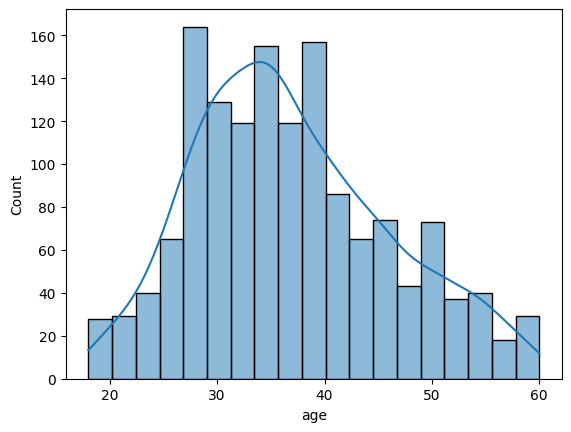

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


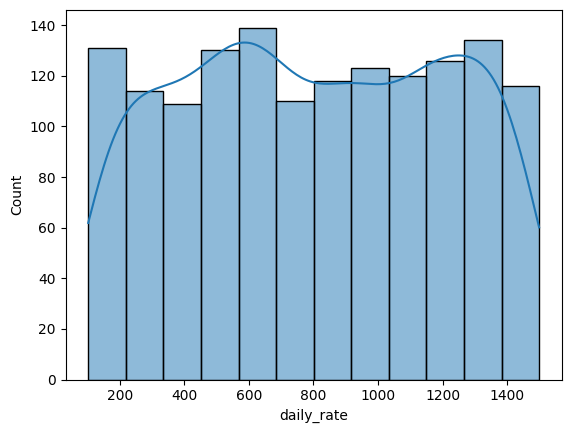

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


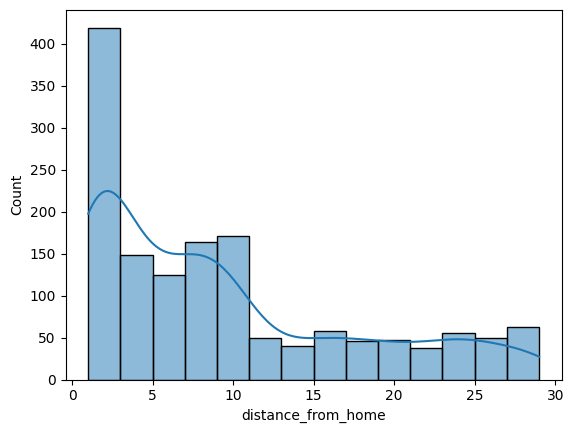

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


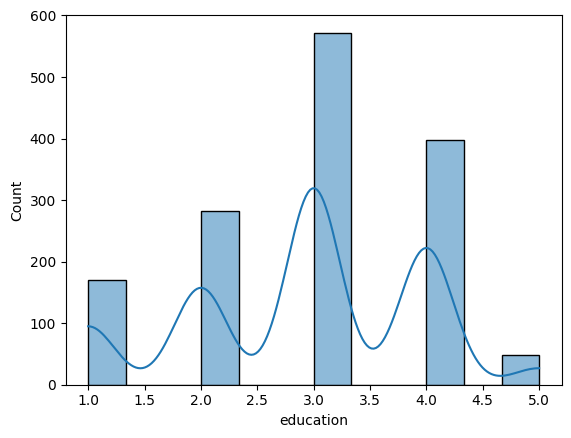

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


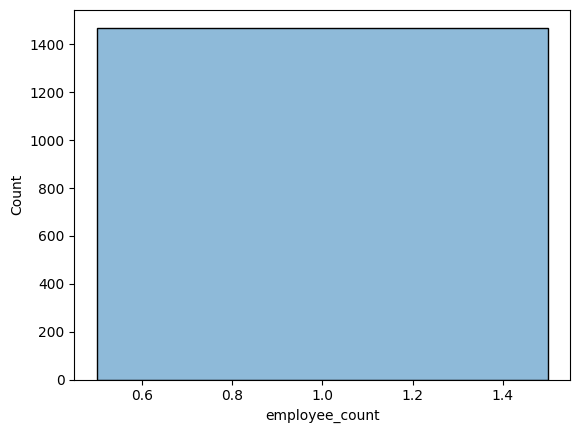

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


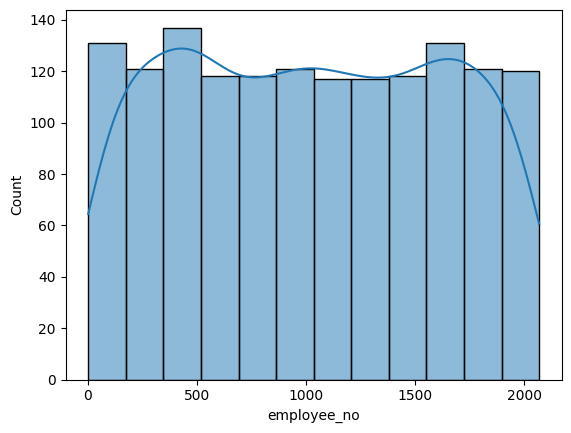

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


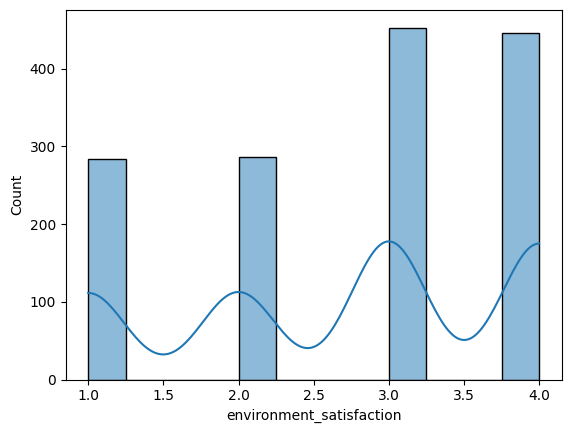

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


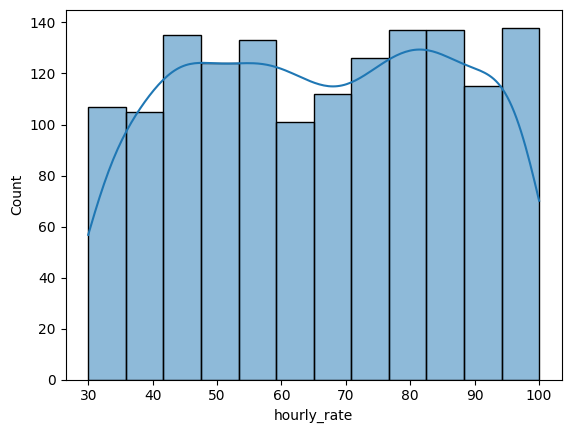

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


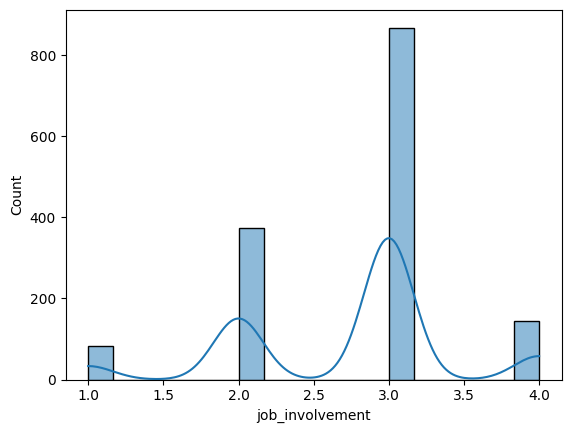

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


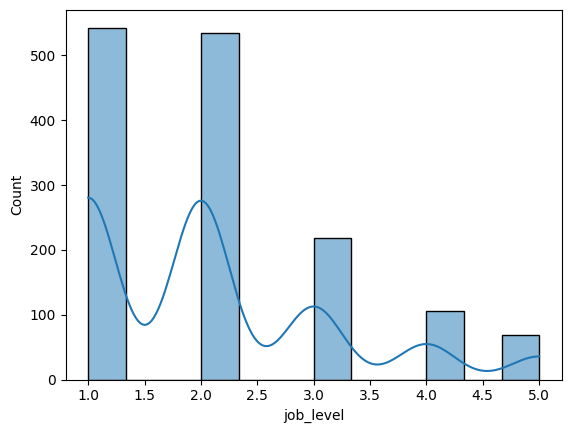

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


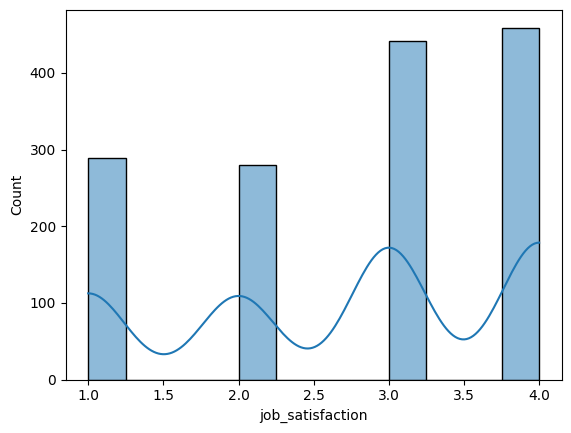

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


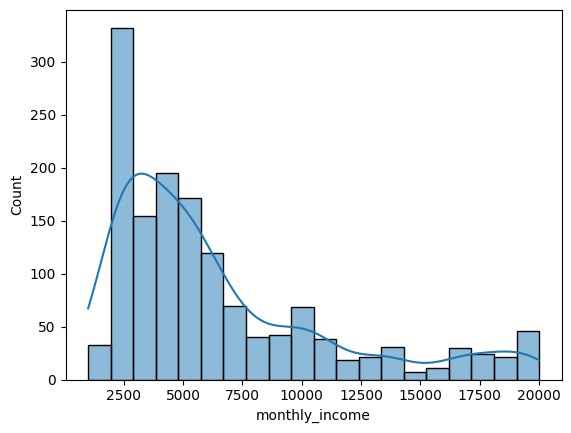

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


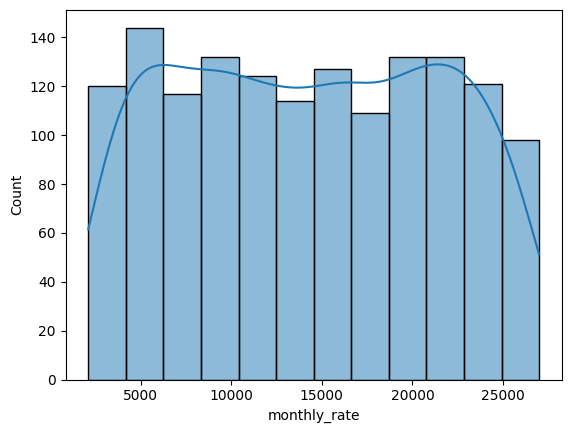

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


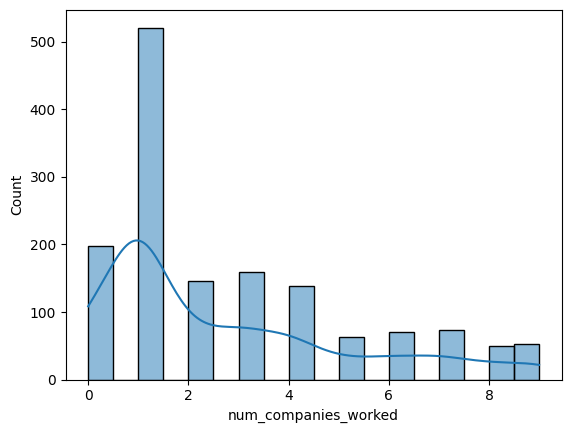

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


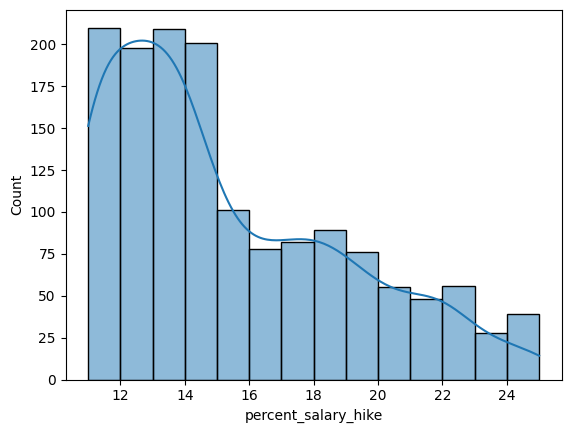

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


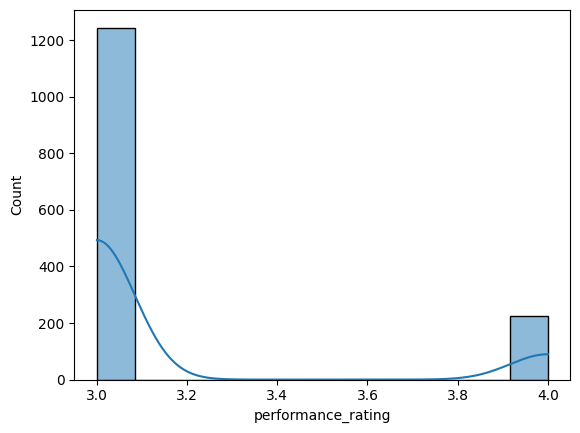

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


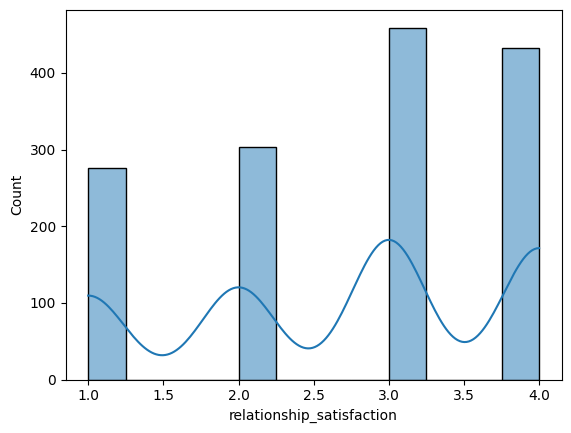

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


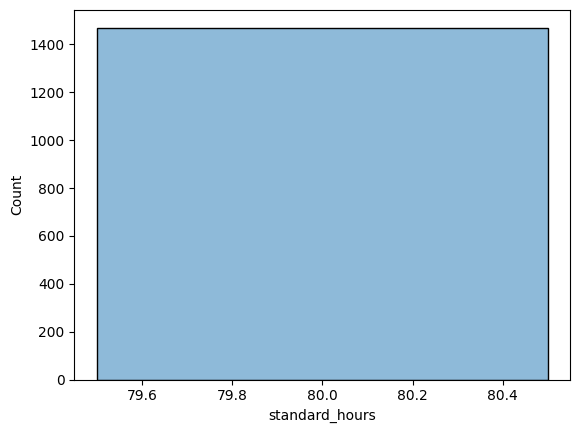

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


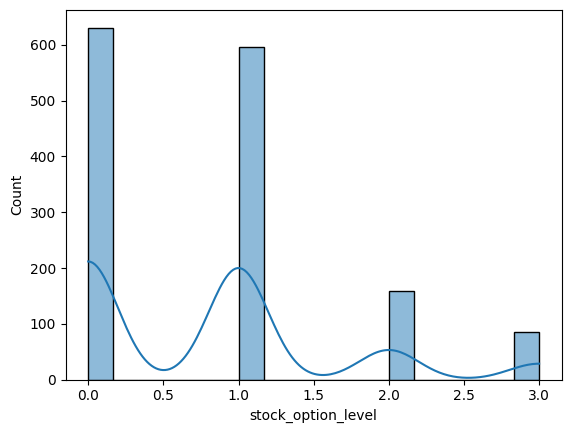

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


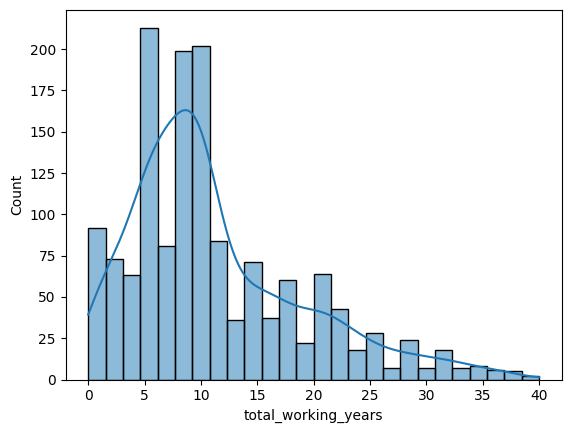

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


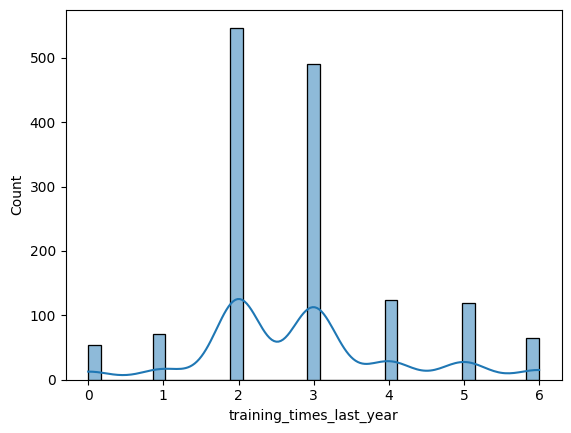

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


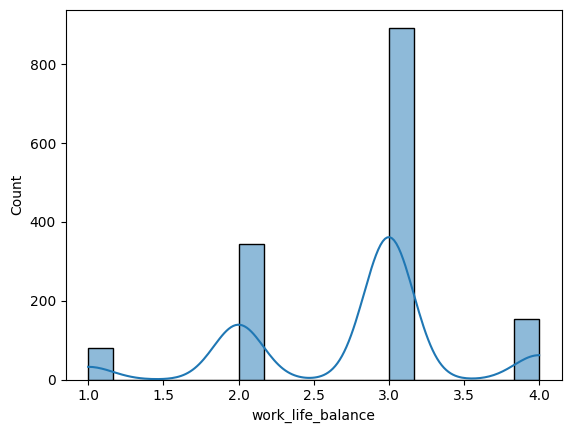

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


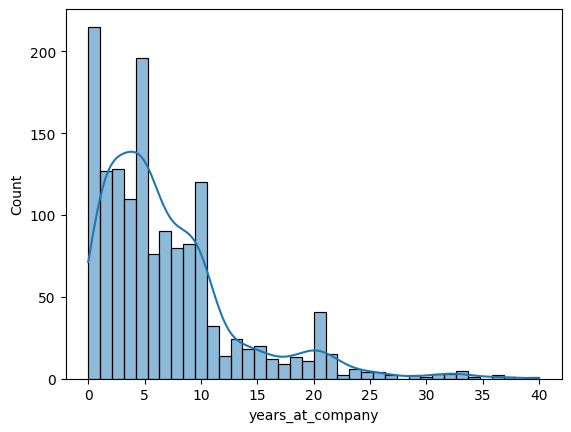

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


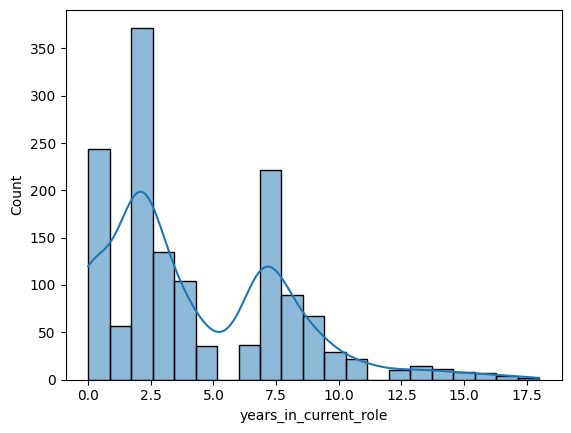

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


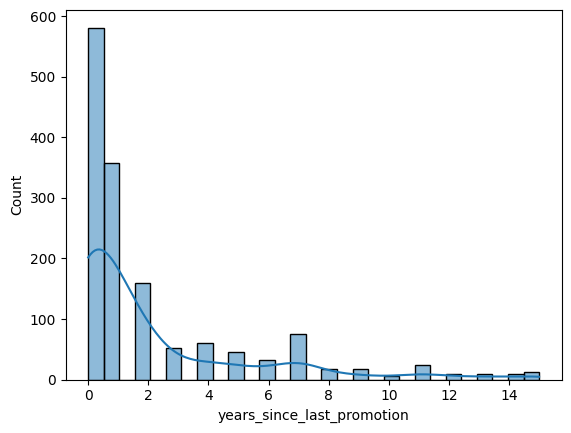

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


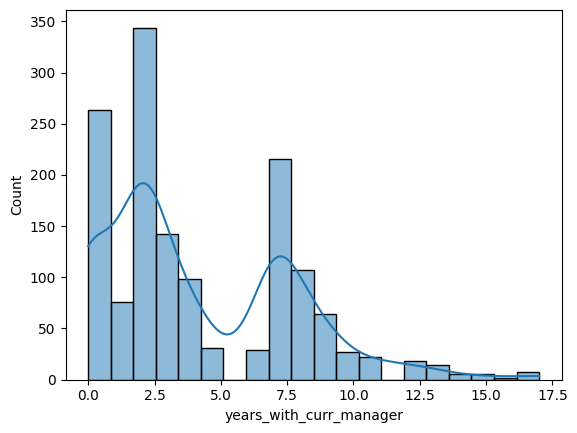

In [14]:
#EDA
#univariate_numeric
for col in num_col:
    sb.histplot(data=df,x=col,kde=True)
    plt.show()

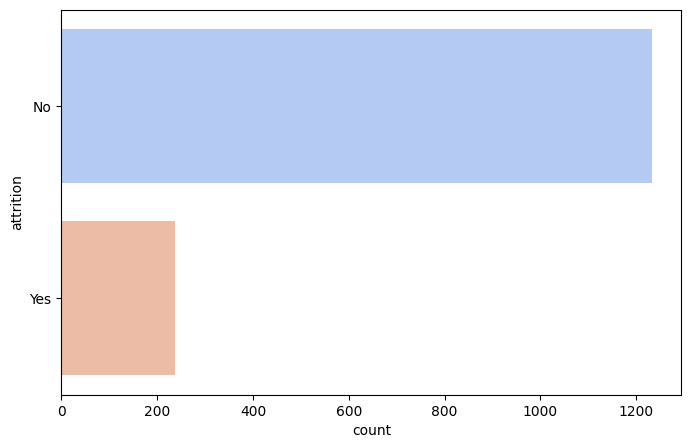

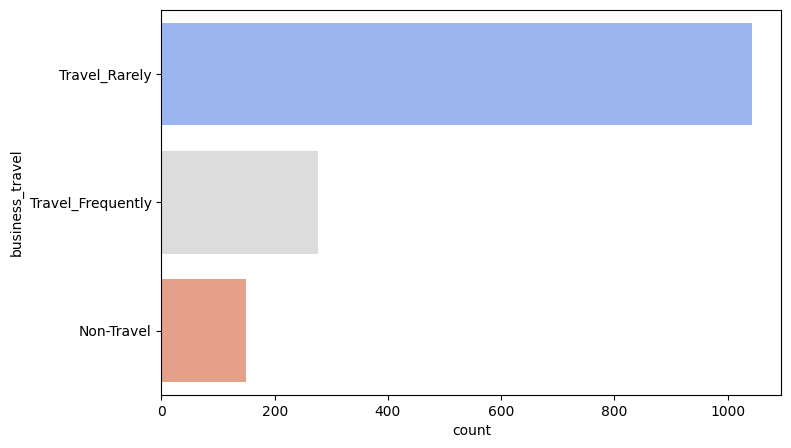

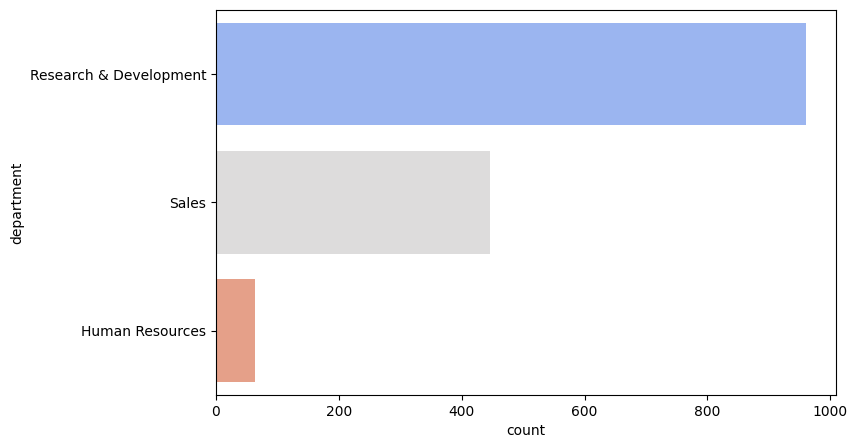

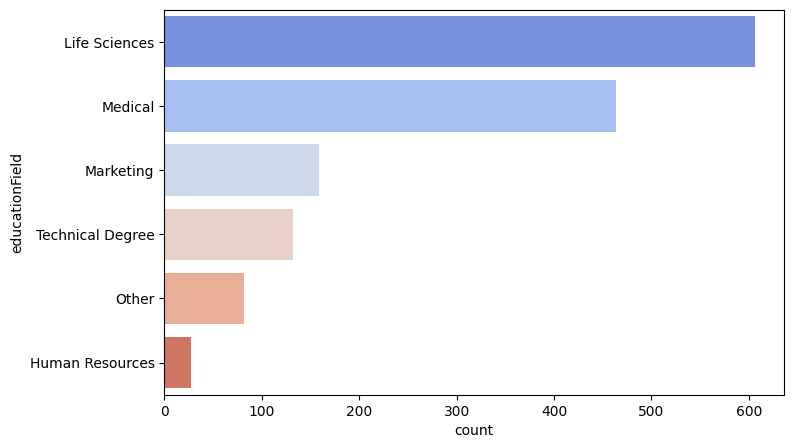

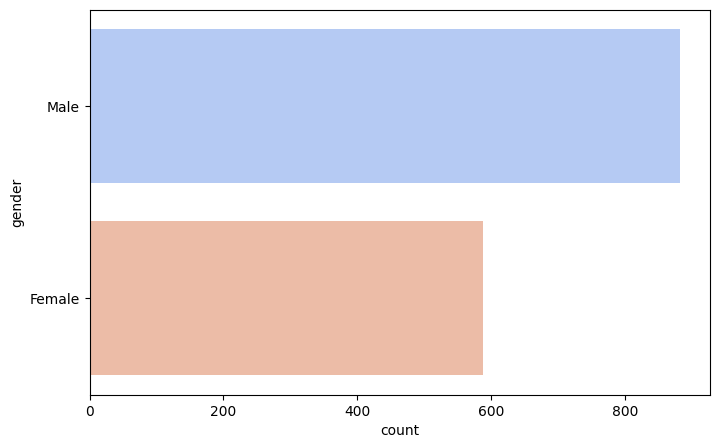

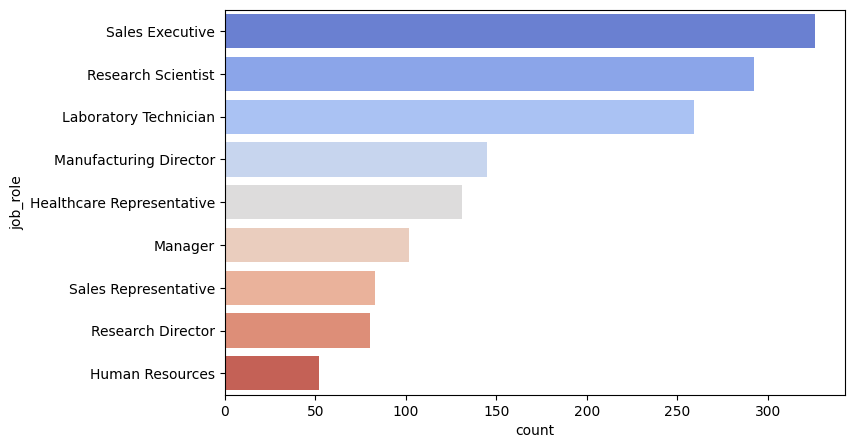

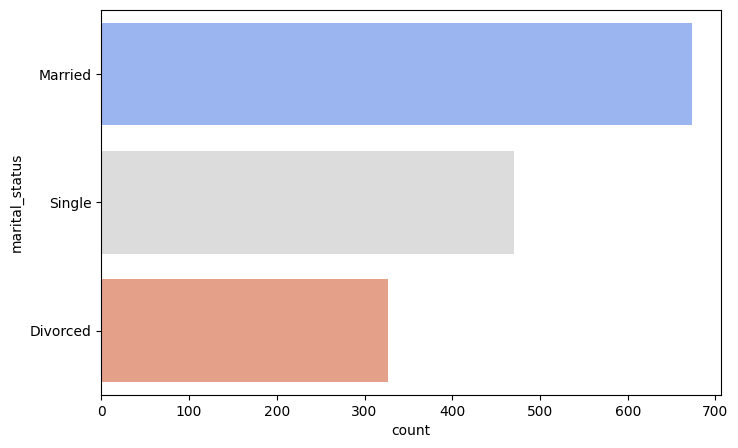

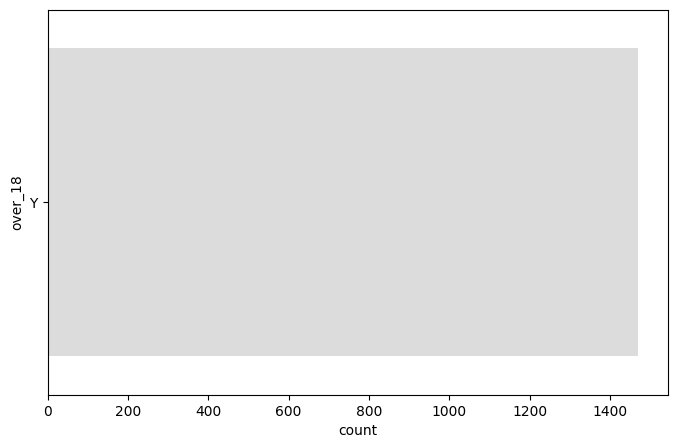

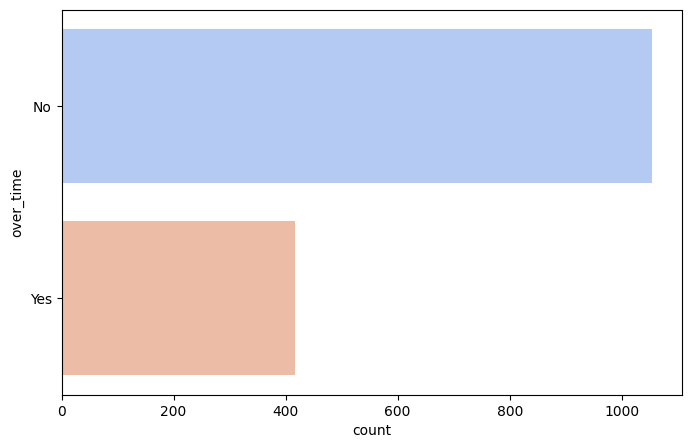

In [15]:
for col in cat_col:
    plt.figure(figsize=(8, 5))
    sb.countplot(data=df, y=col, order=df[col].value_counts().index, palette="coolwarm")
    plt.show()

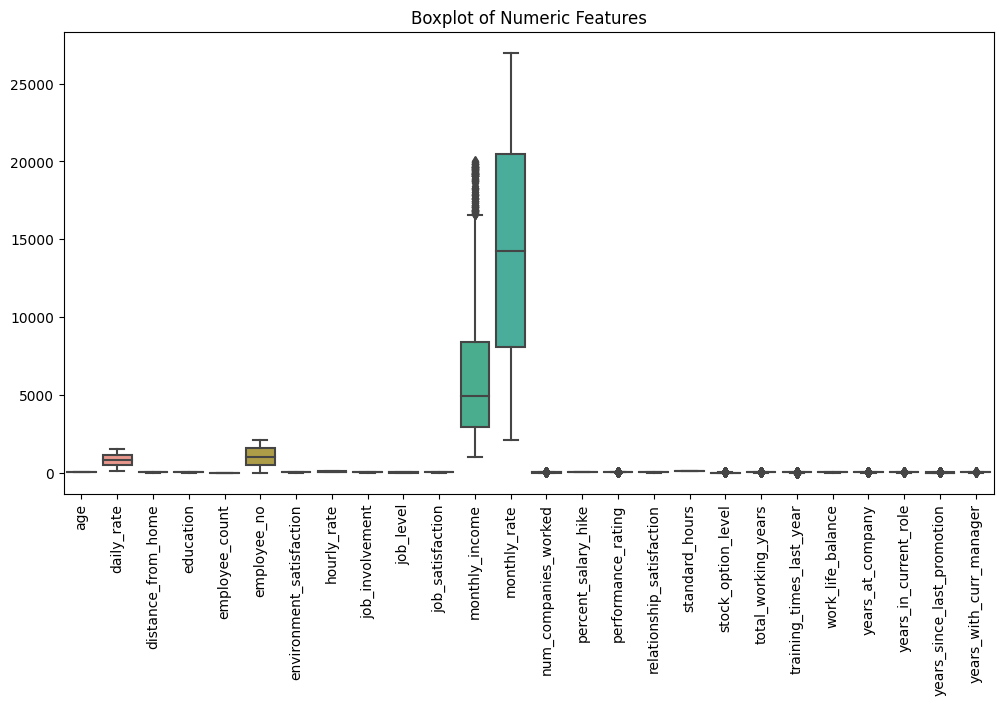

In [16]:
#Boxplot for Visual Outlier Detection
plt.figure(figsize=(12,6))
sb.boxplot(data=df.select_dtypes(include=[np.number]))  # Numeric columns only
plt.xticks(rotation=90)
plt.title("Boxplot of Numeric Features")
plt.show()

In [17]:
#based on univariate analysis over_18=Y/standard_hours=80/employee_count=1 can be dropped 
#as these are same for all the entries

In [18]:
#drop unnecessary columns
udf = df.drop(columns=['over_18', 'standard_hours','employee_count'])

In [19]:
#split numeric/categoric columns
cat_cols = [col for col in udf.columns if udf[col].dtype == 'object']
num_cols = [col for col in udf.columns if udf[col].dtype != 'object']

In [20]:
udf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   age                         1470 non-null   int64 
 1   attrition                   1470 non-null   object
 2   business_travel             1470 non-null   object
 3   daily_rate                  1470 non-null   int64 
 4   department                  1470 non-null   object
 5   distance_from_home          1470 non-null   int64 
 6   education                   1470 non-null   int64 
 7   educationField              1470 non-null   object
 8   employee_no                 1470 non-null   int64 
 9   environment_satisfaction    1470 non-null   int64 
 10  gender                      1470 non-null   object
 11  hourly_rate                 1470 non-null   int64 
 12  job_involvement             1470 non-null   int64 
 13  job_level                   1470 non-null   int6

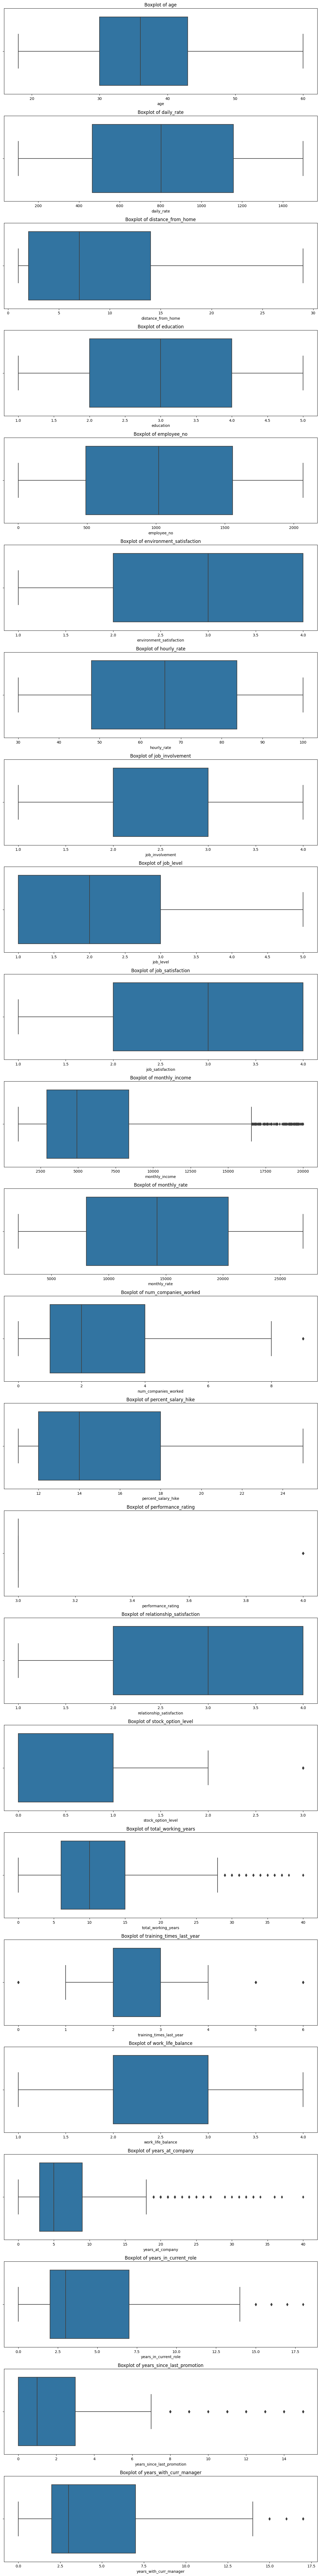

In [21]:
# Plot individual boxplots for each numerical column
plt.figure(figsize=(12, len(num_cols) * 4))  # Adjust figure size dynamically

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)  # Create subplot
    sb.boxplot(x=udf[col])  # Explicitly specify 'x' and 'data'
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


In [22]:
for col in num_cols:
    lower_cap = udf[col].quantile(0.05)  # Set lower limit at 5th percentile
    upper_cap = udf[col].quantile(0.95)  # Set upper limit at 95th percentile
    udf[col] = np.where(udf[col] < lower_cap, lower_cap, udf[col])
    udf[col] = np.where(udf[col] > upper_cap, upper_cap, udf[col])

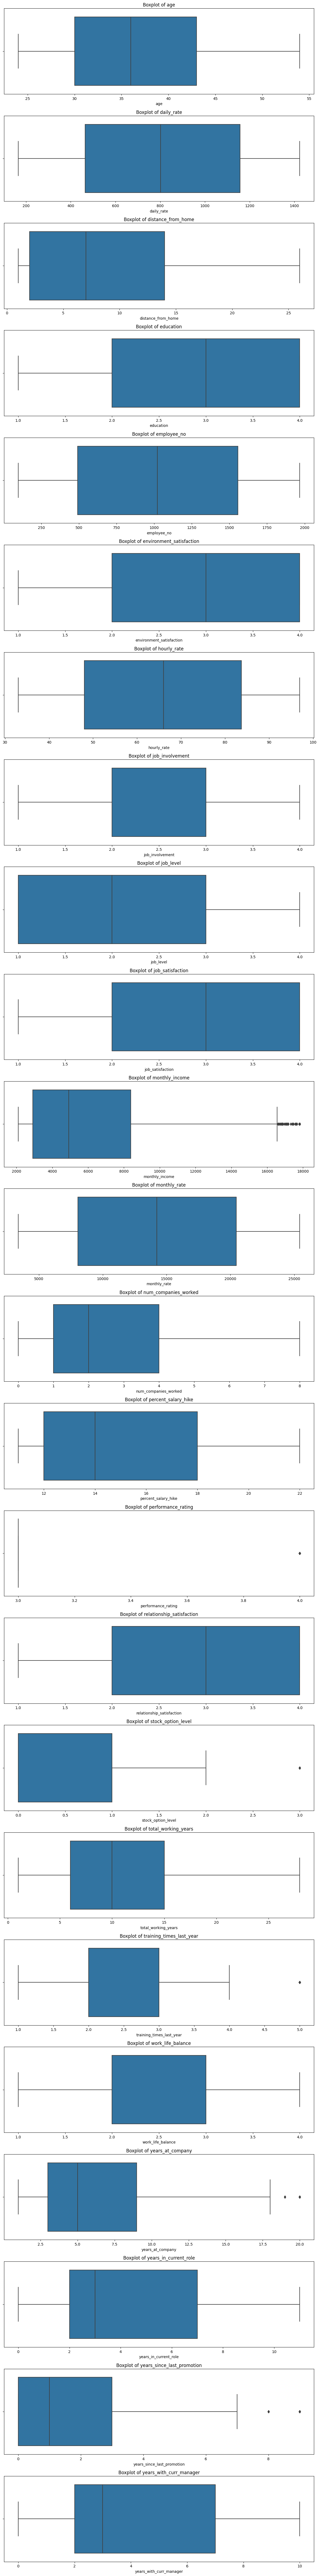

In [23]:
# Plot individual boxplots for each numerical column
plt.figure(figsize=(12, len(num_cols) * 4))  # Adjust figure size dynamically

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)  # Create subplot
    sb.boxplot(x=udf[col])  # Explicitly specify 'x' and 'data'
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [24]:


# Recompute categorical columns safely
cat_cols = udf.select_dtypes(include="object").columns.tolist()

# Exclude target column if present
cat_cols = [col for col in cat_cols if col != "Attrition"]

le = LabelEncoder()

for col in cat_cols:
    udf[col] = le.fit_transform(udf[col].astype(str))

In [25]:
udf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         1470 non-null   float64
 1   attrition                   1470 non-null   int32  
 2   business_travel             1470 non-null   int32  
 3   daily_rate                  1470 non-null   float64
 4   department                  1470 non-null   int32  
 5   distance_from_home          1470 non-null   float64
 6   education                   1470 non-null   float64
 7   educationField              1470 non-null   int32  
 8   employee_no                 1470 non-null   float64
 9   environment_satisfaction    1470 non-null   float64
 10  gender                      1470 non-null   int32  
 11  hourly_rate                 1470 non-null   float64
 12  job_involvement             1470 non-null   float64
 13  job_level                   1470 

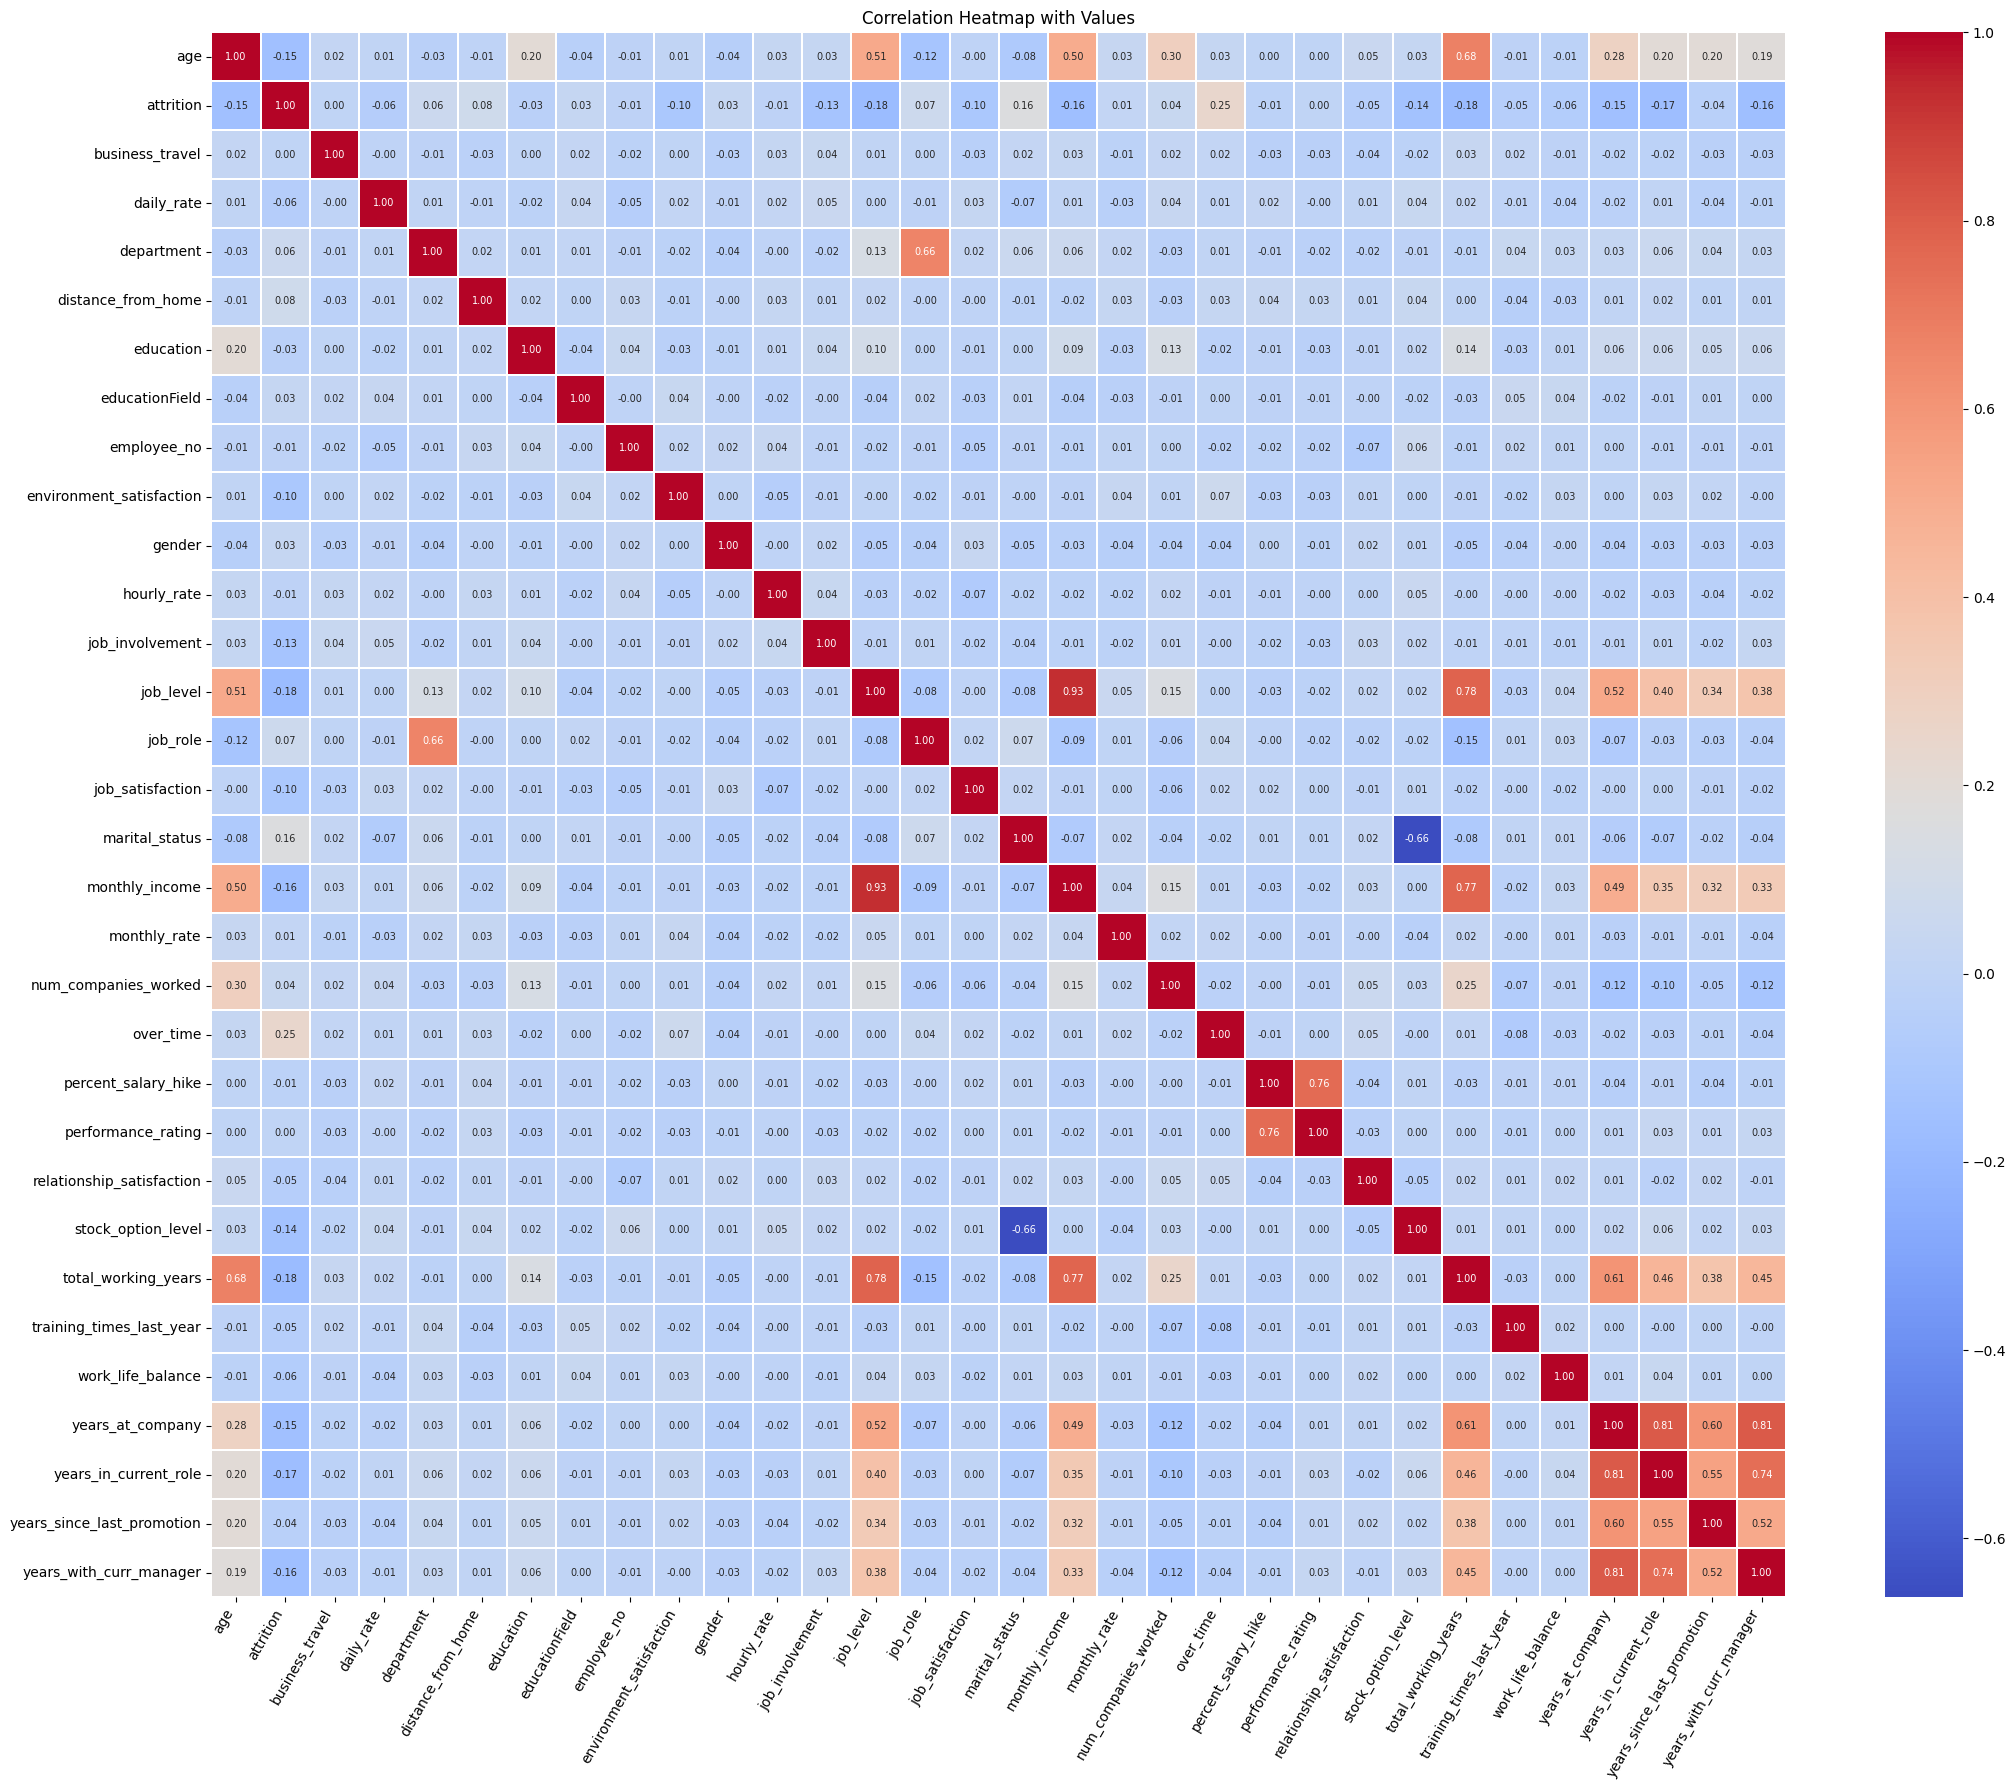

In [26]:
plt.figure(figsize=(22, 18))

sb.heatmap(
    udf.corr(),
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 7},
    linewidths=0.3
)

plt.xticks(rotation=60, ha="right")
plt.title("Correlation Heatmap with Values")
plt.tight_layout()
plt.show()


In [27]:


# Correlation matrix
corr = udf.corr()

# Threshold for strong correlation
THRESHOLD = 0.5

# Identify strong correlations (excluding self-correlation)
strong_corr = corr.where(
    (corr.abs() >= THRESHOLD) & (corr.abs() < 1.0)
)

# Extract unique features involved
core_features = set()
for col in strong_corr.columns:
    if strong_corr[col].notna().any():
        core_features.add(col)
        core_features.update(
            strong_corr.index[strong_corr[col].notna()]
        )

core_features = list(core_features)

print("Core correlated features:")
print(core_features)


Core correlated features:
['percent_salary_hike', 'department', 'age', 'years_at_company', 'job_role', 'total_working_years', 'stock_option_level', 'monthly_income', 'years_with_curr_manager', 'years_in_current_role', 'job_level', 'marital_status', 'performance_rating', 'years_since_last_promotion']


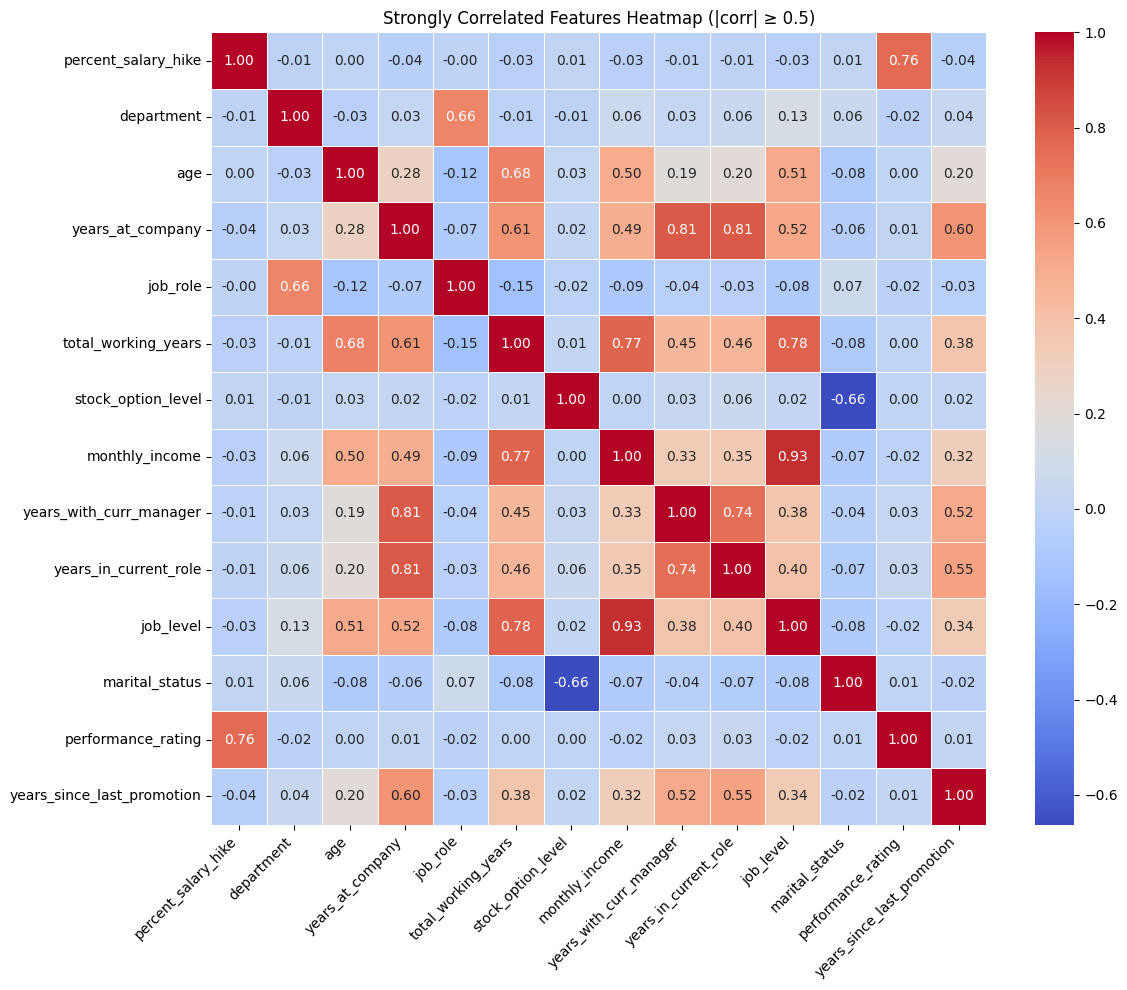

In [28]:
plt.figure(figsize=(12, 10))

sb.heatmap(
    udf[core_features].corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Strongly Correlated Features Heatmap (|corr| ≥ 0.5)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [29]:
#target attrition
udf['attrition'].value_counts()

attrition
0    1233
1     237
Name: count, dtype: int64

In [30]:
# Select performance-related columns
performance_features = [
    "performance_rating", "job_involvement", "years_at_company", "years_in_current_role","years_since_last_promotion", "training_times_last_year", 
    "total_working_years"]

In [31]:
# Normalize the features using Min-Max Scaling
scaler = StandardScaler()
udf[performance_features] = scaler.fit_transform(udf[performance_features])

In [32]:
# Define weightage for each feature (adjust as needed)
weights = {
    "performance_rating": 0.25,
    "job_involvement": 0.25,
    "years_at_company": 0.15,
    "years_in_current_role": 0.15,
    "years_since_last_promotion": 0.10,
    "training_times_last_year": 0.05,
    "total_working_years": 0.05
}

In [33]:
# Compute the weighted performance score
udf["performance_score"] = sum(udf[feature] * weight for feature, weight in weights.items())

In [34]:
# Compute the weighted performance score
df["performance_score"] = sum(df[feature] * weight for feature, weight in weights.items())

In [35]:
# Convert the performance score to a 0-100% scale
udf["performance_score_percent"] = (udf["performance_score"] / udf["performance_score"].max()) * 100

In [36]:
# Convert the performance score to a 0-100% scale
df["performance_score_percent"] = (df["performance_score"] / df["performance_score"].max()) * 100

In [37]:
# Display top 10 employees with the highest performance score
top_performers = udf.nlargest(10, "performance_score_percent")
print(top_performers[["employee_no", "performance_score_percent"]])

      employee_no  performance_score_percent
918       1282.00                 100.000000
1432      1967.55                  97.515551
861       1204.00                  95.060112
978       1375.00                  94.471308
281        387.00                  94.470937
875       1225.00                  94.470937
178        244.00                  93.522698
1414      1967.55                  91.642763
1300      1823.00                  81.509276
1301      1824.00                  81.207058


In [38]:
# Display the dataset with the new column
udf.head()

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,educationField,employee_no,environment_satisfaction,...,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,performance_score,performance_score_percent
0,41.0,1,2,1102.0,2,1.0,2.0,1,96.45,2.0,...,0.0,-0.426680,-1.600577,1.0,-0.148247,-0.033023,-0.745059,5.0,-0.214699,-11.948739
1,49.0,0,1,279.0,1,8.0,1.0,1,96.45,3.0,...,1.0,-0.150433,0.185944,3.0,0.610406,0.871528,-0.376168,7.0,0.516445,28.741963
2,37.0,1,2,1373.0,1,2.0,2.0,4,96.45,4.0,...,0.0,-0.564804,0.185944,3.0,-1.096564,-1.239092,-0.745059,0.0,-0.806897,-44.906602
3,33.0,0,1,1392.0,1,3.0,4.0,1,96.45,4.0,...,0.0,-0.426680,0.185944,3.0,0.231080,0.871528,0.361613,0.0,0.177876,9.899433
4,27.0,0,2,591.0,1,2.0,1.0,3,96.45,1.0,...,1.0,-0.702928,0.185944,3.0,-0.906900,-0.636058,-0.007277,2.0,-0.269660,-15.007527


In [39]:
# Separate features (X) and target (y)
X = udf.drop(columns=["attrition"])
y = udf["attrition"]

In [40]:
# Convert categorical variables using One-Hot Encoding or Label Encoding
X = pd.get_dummies(X, drop_first=True)  # One-Hot Encoding

In [41]:
# OR use Label Encoding for ordinal categorical variables
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

In [42]:
# Apply SMOTE after encoding categorical variables
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back to DataFrame
sdf = pd.DataFrame(X_resampled, columns=X.columns)
sdf["attrition"] = y_resampled  # Restore target column

print("SMOTE applied successfully!")

SMOTE applied successfully!


In [43]:
print(sdf['attrition'].value_counts())

attrition
1    1233
0    1233
Name: count, dtype: int64


In [44]:
sdf.head()

,age,business_travel,daily_rate,department,distance_from_home,education,educationField,employee_no,environment_satisfaction,gender,...,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,performance_score,performance_score_percent,attrition
0,41.0,2,1102.0,2,1.0,2.0,1,96.45,2.0,0,...,-0.426680,-1.600577,1.0,-0.148247,-0.033023,-0.745059,5.0,-0.214699,-11.948739,1
1,49.0,1,279.0,1,8.0,1.0,1,96.45,3.0,1,...,-0.150433,0.185944,3.0,0.610406,0.871528,-0.376168,7.0,0.516445,28.741963,0
2,37.0,2,1373.0,1,2.0,2.0,4,96.45,4.0,1,...,-0.564804,0.185944,3.0,-1.096564,-1.239092,-0.745059,0.0,-0.806897,-44.906602,1
3,33.0,1,1392.0,1,3.0,4.0,1,96.45,4.0,0,...,-0.426680,0.185944,3.0,0.231080,0.871528,0.361613,0.0,0.177876,9.899433,0
4,27.0,2,591.0,1,2.0,1.0,3,96.45,1.0,1,...,-0.702928,0.185944,3.0,-0.906900,-0.636058,-0.007277,2.0,-0.269660,-15.007527,0


In [45]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         2466 non-null   float64
 1   business_travel             2466 non-null   int32  
 2   daily_rate                  2466 non-null   float64
 3   department                  2466 non-null   int32  
 4   distance_from_home          2466 non-null   float64
 5   education                   2466 non-null   float64
 6   educationField              2466 non-null   int32  
 7   employee_no                 2466 non-null   float64
 8   environment_satisfaction    2466 non-null   float64
 9   gender                      2466 non-null   int32  
 10  hourly_rate                 2466 non-null   float64
 11  job_involvement             2466 non-null   float64
 12  job_level                   2466 non-null   float64
 13  job_role                    2466 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='performance_score', ylabel='attrition'>

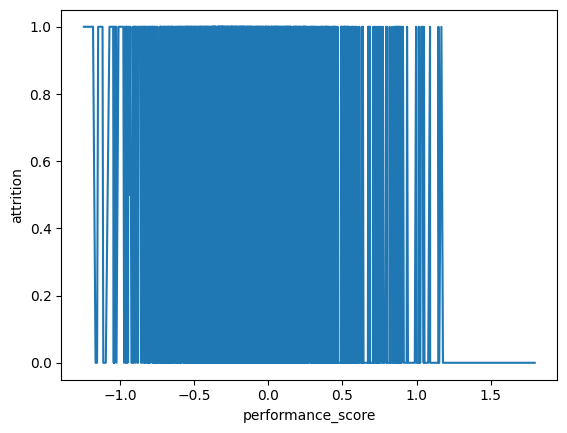

In [46]:
sb.lineplot(data=sdf, x='performance_score',y='attrition')

In [47]:
#split train/test data
ax_train, ax_test, ay_train, ay_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=2)

In [48]:
#RFC
rfc = RandomForestClassifier(class_weight='balanced', random_state=42)
rfc.fit(ax_train, ay_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [49]:
# Get feature importance
rf_importances = rfc.feature_importances_

In [50]:
# Convert to DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

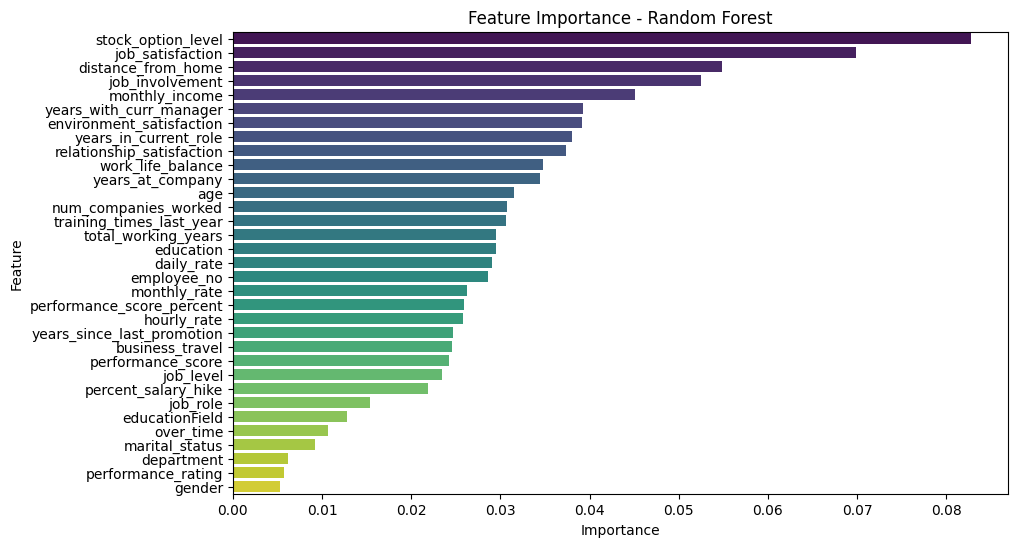

In [51]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sb.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.show()

In [52]:
#"over_time", "stock_option_level", "maraital_status", "job_satisfaction","monthly_income", "distance_from_home", 
#"job_involvement","years_in_current_role"

In [53]:
#feature_selection
X1 = sdf[["over_time", "stock_option_level", "marital_status", "job_satisfaction","monthly_income", "distance_from_home","job_involvement",
          "years_in_current_role"]]
y1 = sdf['attrition']

In [54]:
#split data to train and test
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.20, random_state = 5)

In [55]:
#data standardization
scaler=StandardScaler()

In [56]:
scaler.fit(x_train)

StandardScaler()

In [57]:
std_x_train=scaler.transform(x_train)
std_x_test=scaler.transform(x_test)

In [58]:
#model
#DTC
dtc = DecisionTreeClassifier()
dtc.fit(std_x_train, y_train)

DecisionTreeClassifier()

In [59]:
# Dictionary to store results
model_results = {}

In [60]:
dtc_pred = dtc.predict(std_x_test)
dtc_acc = accuracy_score(y_test, dtc_pred)
print(dtc_acc)
print(accuracy_score(y_train, dtc.predict(std_x_train)))
dtc_auc = roc_auc_score(y_test, dtc.predict_proba(std_x_test)[:, 1])
print(confusion_matrix(y_test, dtc_pred))
print(f"Classification Report :- \n {classification_report(y_test, dtc_pred)}")
model_results["Decision Tree"] = [
    accuracy_score(y_test, dtc_pred),
    precision_score(y_test, dtc_pred),
    recall_score(y_test, dtc_pred),
    f1_score(y_test, dtc_pred),
    dtc_auc
]

0.8157894736842105
1.0
[[190  47]
 [ 44 213]]
Classification Report :- 
               precision    recall  f1-score   support

           0       0.81      0.80      0.81       237
           1       0.82      0.83      0.82       257

    accuracy                           0.82       494
   macro avg       0.82      0.82      0.82       494
weighted avg       0.82      0.82      0.82       494



In [61]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(
        n_estimators=100, random_state=42
    ),
    "XGBoost": XGBClassifier(
        eval_metric="logloss",
        use_label_encoder=False,
        random_state=42
    )
}


In [62]:
model_results = {}

for name, model in models.items():
    # Train
    model.fit(std_x_train, y_train)

    # Predictions
    y_pred = model.predict(std_x_test)
    y_prob = model.predict_proba(std_x_test)[:, 1]

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)

    model_results[name] = [acc, auc, prec, rec, f1, mcc]

    # Print (optional but good for notebook)
    print(f"\n{name}")
    print("Accuracy:", acc)
    print("AUC:", auc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



Logistic Regression
Accuracy: 0.6983805668016194
AUC: 0.7527458996207458
Confusion Matrix:
 [[166  71]
 [ 78 179]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.70      0.69       237
           1       0.72      0.70      0.71       257

    accuracy                           0.70       494
   macro avg       0.70      0.70      0.70       494
weighted avg       0.70      0.70      0.70       494


Decision Tree
Accuracy: 0.8117408906882592
AUC: 0.8113497184324155
Confusion Matrix:
 [[190  47]
 [ 46 211]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.80       237
           1       0.82      0.82      0.82       257

    accuracy                           0.81       494
   macro avg       0.81      0.81      0.81       494
weighted avg       0.81      0.81      0.81       494


KNN
Accuracy: 0.7449392712550608
AUC: 0.8179907731205569
Confusion Matr

C:\Users\Hxtreme\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [07:22:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost
Accuracy: 0.8765182186234818
AUC: 0.9437357369190104
Confusion Matrix:
 [[214  23]
 [ 38 219]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.88       237
           1       0.90      0.85      0.88       257

    accuracy                           0.88       494
   macro avg       0.88      0.88      0.88       494
weighted avg       0.88      0.88      0.88       494



In [63]:
results_df = pd.DataFrame(
    model_results,
    index=["Accuracy", "AUC", "Precision", "Recall", "F1 Score", "MCC"]
).T

results_df


,Accuracy,AUC,Precision,Recall,F1 Score,MCC
Logistic Regression,0.698381,0.752746,0.716000,0.696498,0.706114,0.396624
Decision Tree,0.811741,0.811350,0.817829,0.821012,0.819417,0.622807
KNN,0.744939,0.817991,0.719064,0.836576,0.773381,0.492795
Naive Bayes,0.663968,0.748609,0.656357,0.743191,0.697080,0.326204
Random Forest,0.884615,0.941429,0.931034,0.840467,0.883436,0.773751
XGBoost,0.876518,0.943736,0.904959,0.852140,0.877756,0.754629


In [64]:
# Sort models by F1 Score (highest first)
results_sorted = results_df.sort_values(by="F1 Score", ascending=False)

results_sorted


,Accuracy,AUC,Precision,Recall,F1 Score,MCC
Random Forest,0.884615,0.941429,0.931034,0.840467,0.883436,0.773751
XGBoost,0.876518,0.943736,0.904959,0.852140,0.877756,0.754629
Decision Tree,0.811741,0.811350,0.817829,0.821012,0.819417,0.622807
KNN,0.744939,0.817991,0.719064,0.836576,0.773381,0.492795
Logistic Regression,0.698381,0.752746,0.716000,0.696498,0.706114,0.396624
Naive Bayes,0.663968,0.748609,0.656357,0.743191,0.697080,0.326204


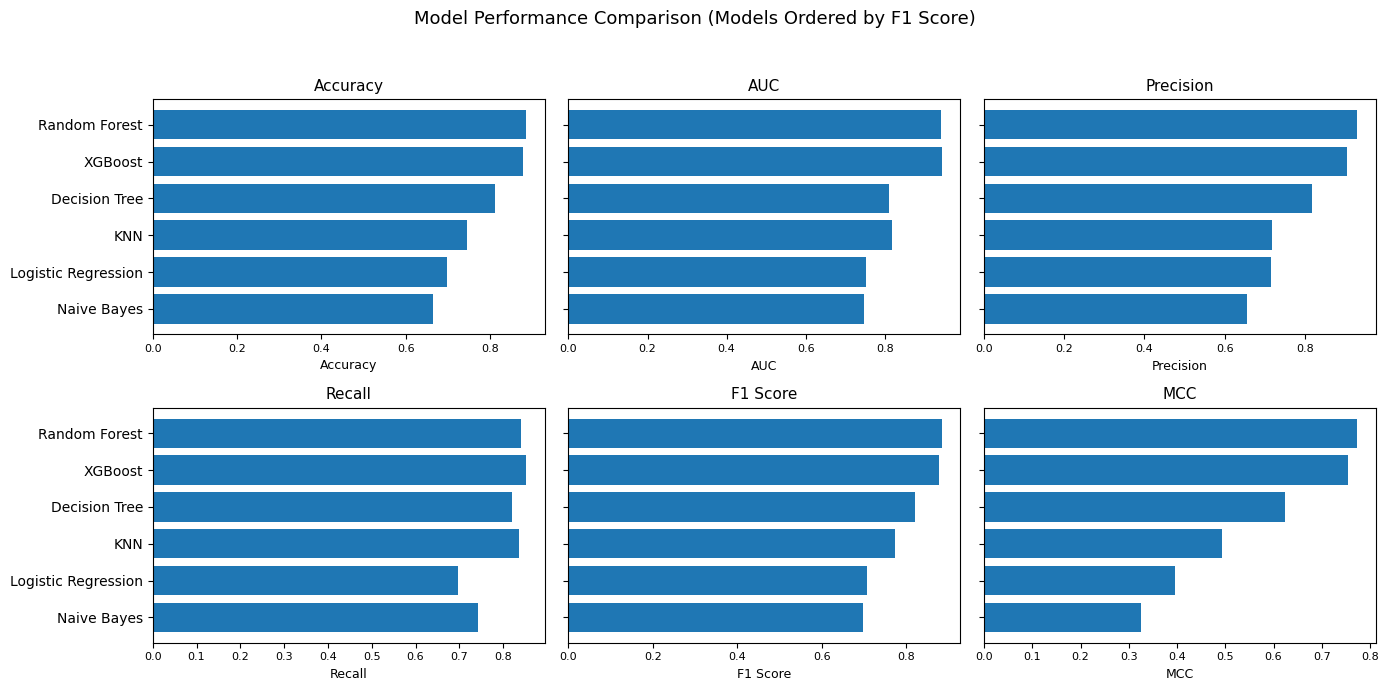

In [73]:
import matplotlib.pyplot as plt

metrics = ["Accuracy", "AUC", "Precision", "Recall", "F1 Score", "MCC"]

fig, axes = plt.subplots(
    nrows=2,
    ncols=3,
    figsize=(14, 7),
    sharey=True
)

axes = axes.flatten()

for ax, metric in zip(axes, metrics):
    ax.barh(
        results_sorted.index,
        results_sorted[metric]
    )
    ax.set_title(metric, fontsize=11)
    ax.set_xlabel(metric, fontsize=9)
    ax.tick_params(axis='x', labelsize=8)

# Highest-performing model at top
axes[0].invert_yaxis()

plt.suptitle(
    "Model Performance Comparison (Models Ordered by F1 Score)",
    fontsize=13
)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [66]:

os.makedirs("model", exist_ok=True)

for name, model in models.items():
    file_name = name.lower().replace(" ", "_") + ".pkl"
    joblib.dump(model, f"model/{file_name}")


In [67]:
from sklearn.preprocessing import StandardScaler
import joblib
import os

# ==============================
# Data Standardization
# ==============================
scaler = StandardScaler()
scaler.fit(x_train)

std_x_train = scaler.transform(x_train)
std_x_test = scaler.transform(x_test)

# ==============================
# Save scaler for Streamlit
# ==============================
os.makedirs("model", exist_ok=True)
joblib.dump(scaler, "model/scaler.pkl")

print("Scaler fitted and saved as model/scaler.pkl")


Scaler fitted and saved as model/scaler.pkl


In [68]:
joblib.load("model/scaler.pkl")


StandardScaler()

In [70]:
# =========================================
# Create test CSV for Streamlit upload
# =========================================

import pandas as pd
import os

# Assuming these already exist:
# X_test (raw features, NOT scaled)
# y_test (target)

# Combine features and target
test_df = x_test.copy()
test_df["Attrition"] = y_test.values

# Create data folder if needed
os.makedirs("data", exist_ok=True)

# Save CSV
test_df.to_csv("data/employee_attrition_test.csv", index=False)

print("Test dataset saved as data/employee_attrition_test.csv")
print("Shape:", test_df.shape)


Test dataset saved as data/employee_attrition_test.csv
Shape: (494, 9)
